## A spectrum of workflows

- The Sequential model
- The Functional API
- Model subclassing

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

### The Sequential model
> simplest way to build a Keras model

In [2]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

Metal device set to: Apple M1 Max


2023-01-28 16:58:33.525303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-28 16:58:33.525448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.build(input_shape=(None, 3))

In [4]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.20725888,  0.21683049, -0.07715575,  0.09229496, -0.2529131 ,
          0.26553375, -0.1762295 , -0.20142043,  0.09926239,  0.03032288,
         -0.2009872 ,  0.2711398 ,  0.1521006 ,  0.269944  ,  0.02335894,
         -0.17188936,  0.20006168,  0.15016308, -0.1912089 , -0.26806962,
         -0.01839   ,  0.04699022,  0.15248129, -0.0540563 ,  0.20592189,
         -0.11564469,  0.00106144,  0.10974142,  0.21795678, -0.0273574 ,
          0.06771627,  0.10840136,  0.21240973, -0.04992108,  0.06027731,
         -0.16087112, -0.26859853,  0.01651052,  0.05002952, -0.23915166,
          0.09491128,  0.00768206,  0.23525697,  0.25319207, -0.09822287,
         -0.08162303,  0.07188997,  0.17533216, -0.1970499 , -0.08166862,
         -0.18212822,  0.07585958, -0.15259224, -0.06982102, -0.16411799,
         -0.14388515, -0.17763877, -0.16407277,  0.21465397,  0.19485605,
          0.00512317, -0.09489615,  0.0408163

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=(3,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add?

Signature: model.add(layer)
Docstring:
Adds a layer instance on top of the layer stack.

Args:
    layer: layer instance.

Raises:
    TypeError: If `layer` is not a layer instance.
    ValueError: In case the `layer` argument does not
        know its input shape.
    ValueError: In case the `layer` argument has
        multiple output tensors, or is already connected
        somewhere else (forbidden in `Sequential` models).
File:      /opt/homebrew/Caskroom/miniconda/base/envs/ml-playground/lib/python3.9/site-packages/keras/engine/sequential.py
Type:      method


### The Functional API
> most common in the wild

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### multi-input, multi-output models

In [11]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(
    features
)
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [12]:
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)

model.fit(
    [title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1
)
model.evaluate(
    [title_data, text_body_data, tags_data], [priority_data, department_data]
)
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

2023-01-28 16:58:33.898194: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/40 [..............................] - ETA: 16s - loss: 3.2578 - priority_loss: 0.1160 - department_loss: 3.1417 - priority_mean_absolute_error: 0.2770 - department_accuracy: 0.1562

2023-01-28 16:58:34.162736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/40 [==========>...................] - ETA: 0s - loss: 6.4649 - priority_loss: 0.3530 - department_loss: 6.1119 - priority_mean_absolute_error: 0.5206 - department_accuracy: 0.0917

2023-01-28 16:58:34.864095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 3ms/step


2023-01-28 16:58:35.288463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


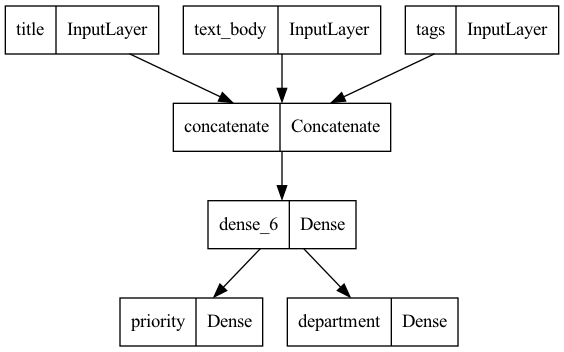

In [13]:
keras.utils.plot_model(model, "./assets/ticket_classifier.png")

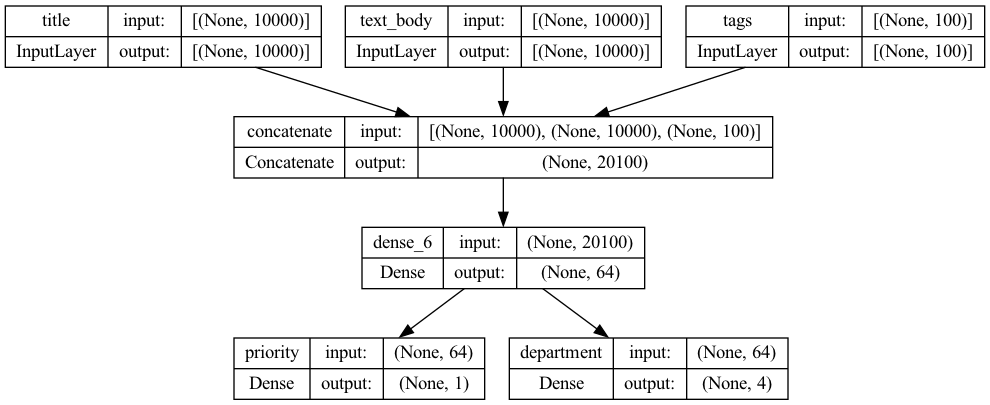

In [14]:
keras.utils.plot_model(
    model, "./assets/ticket_classifier_with_shape_info.png", show_shapes=True
)

In [15]:
model.layers

In [16]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

extend the model using existing intermediate layer outputs

In [17]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags], outputs=[priority, department, difficulty]
)

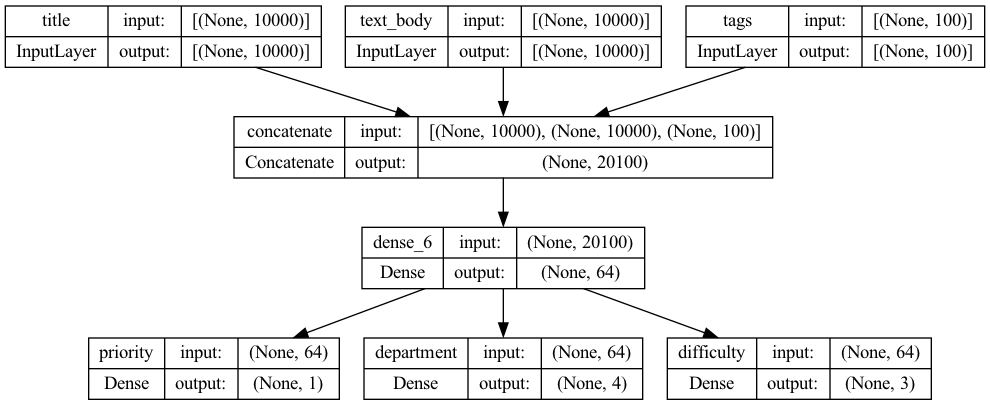

In [18]:
keras.utils.plot_model(
    new_model, "./assets/updated_ticket_classifier.png", show_shapes=True
)

### Subclassing the Model class
> most advanced

In [19]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [20]:
model = CustomerTicketModel(num_departments=4)
priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

In [21]:
model.compile(
    optimizer="rmsprop",
    loss=["mean_squared_error", "categorical_crossentropy"],
    metrics=[["mean_absolute_error"], ["accuracy"]],
)

model.fit(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    [priority_data, department_data],
    epochs=1,
)

model.evaluate(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data},
    [priority_data, department_data],
)

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data}
)

 5/40 [==>...........................] - ETA: 0s - loss: 47.0786 - output_1_loss: 0.2568 - output_2_loss: 46.8218 - output_1_mean_absolute_error: 0.4234 - output_2_accuracy: 0.3250

2023-01-28 16:58:36.908488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/40 [==========>...................] - ETA: 0s - loss: 35.0910 - output_1_loss: 0.3530 - output_2_loss: 34.7380 - output_1_mean_absolute_error: 0.5206 - output_2_accuracy: 0.3042

2023-01-28 16:58:37.558902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 3ms/step


2023-01-28 16:58:37.993392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [22]:
model.summary()

Model: "customer_ticket_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 concatenate_1 (Concatenate)  multiple                 0         
                                                                 
 dense_7 (Dense)             multiple                  1286464   
                                                                 
 dense_8 (Dense)             multiple                  65        
                                                                 
 dense_9 (Dense)             multiple                  260       
                                                                 
Total params: 1,286,789
Trainable params: 1,286,789
Non-trainable params: 0
_________________________________________________________________


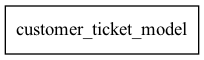

In [23]:
keras.utils.plot_model(
    model, "./assets/customer_ticket_classifier.png", show_shapes=True
)

### mixing and matching different components

In [24]:
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes

            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

In [25]:
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [26]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 64)                256       
                                                                 
 classifier (Classifier)     (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### the standard workflow

In [27]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model


(images, labels), (test_images, test_labels) = mnist.load_data()

images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(
    train_images, train_labels, epochs=3, validation_data=(val_images, val_labels)
)
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
   8/1563 [..............................] - ETA: 11s - loss: 1.8388 - accuracy: 0.3672 

2023-01-28 16:58:38.951968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2808 - accuracy: 0.9167

2023-01-28 16:58:48.839019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 11s 7ms/step - loss: 0.2808 - accuracy: 0.9167 - val_loss: 0.1461 - val_accuracy: 0.9576
Epoch 2/3
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1543 - accuracy: 0.9564 - val_loss: 0.1269 - val_accuracy: 0.9648
Epoch 3/3
 94/313 [========>.....................] - ETA: 0s

2023-01-28 16:59:12.342469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


#### callbacks

In [28]:
model = get_mnist_model()

model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./logs",
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(val_images, val_labels),
    callbacks=[tensorboard],
)

Epoch 1/10
   8/1563 [..............................] - ETA: 11s - loss: 1.7836 - accuracy: 0.4531 

2023-01-28 16:59:13.157457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.9148

2023-01-28 16:59:22.577763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 11s 7ms/step - loss: 0.2870 - accuracy: 0.9148 - val_loss: 0.1661 - val_accuracy: 0.9504
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1557 - accuracy: 0.9572 - val_loss: 0.1273 - val_accuracy: 0.9638
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1253 - accuracy: 0.9651 - val_loss: 0.1175 - val_accuracy: 0.9700
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1121 - accuracy: 0.9709 - val_loss: 0.1123 - val_accuracy: 0.9719
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1020 - accuracy: 0.9740 - val_loss: 0.1124 - val_accuracy: 0.9742
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0941 - accuracy: 0.9773 - val_loss: 0.1181 - val_accuracy: 0.9744
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0859 - accuracy: 0.9783 - val_loss: 0.1149 - val_accuracy: 0.9

viz the log by `pdm run tensorboard --logdir ./notebooks/logs/`